<a href="https://colab.research.google.com/github/amanes0310/DataScienceFA24/blob/main/FinalProjectMA346.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

import sklearn.linear_model as sklm
import sklearn.model_selection as skms

In [ ]:
dat = pd.read_csv('gym_members_exercise_tracking.csv')
dat

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


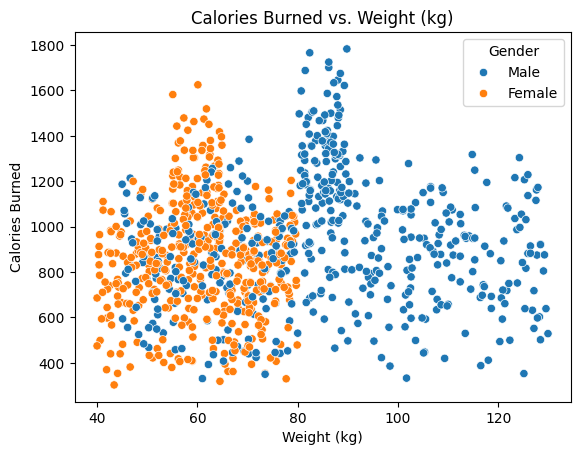

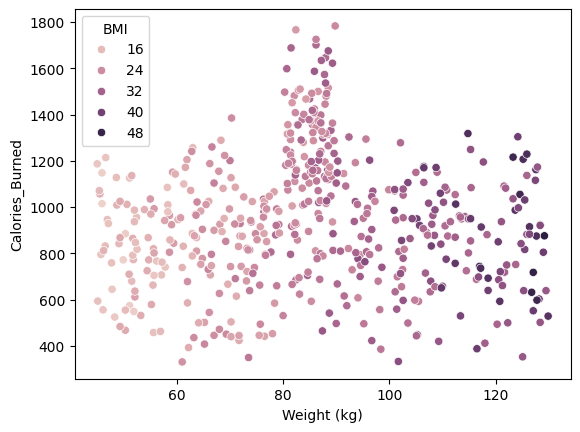

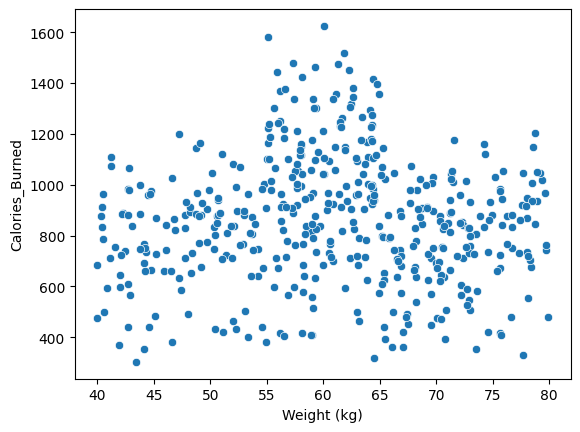

True

In [ ]:
# Exploratory data analysis
sns.scatterplot(data=dat, x='Weight (kg)', y='Calories_Burned', hue='Gender')
plt.title('Calories Burned vs. Weight (kg)')
plt.xlabel('Weight (kg)')
plt.ylabel('Calories Burned')
plt.show()

# Subsetting for men to see if a trend exists.
datMale = dat.loc[dat['Gender'] == 'Male']

# Analysis to show if there are a significantly different number of men within the 80-100kg
# range that rate themselves a level 3 (expert) experience.

datHeavyandLightMen = datMale.loc[(datMale['Weight (kg)'] < 80) | (datMale['Weight (kg)'] > 100)]
datMediumMen = datMale.loc[(datMale['Weight (kg)'] < 100) & (datMale['Weight (kg)'] > 80)]

(datHeavyandLightMen['Experience_Level'] == 3).mean()
(datMediumMen['Experience_Level'] == 3).mean()

# Looking for the trend in women as well.
datFemale = dat.loc[dat['Gender'] == 'Female']
sns.scatterplot(data=datFemale, x='Weight (kg)', y='Calories_Burned')
plt.show()

# Run a t test to see if these proportions are statistically significant

# Define experienced, middle-weighted men (num. obs.) and middle-weighted men.
datMediumExperienced = len(datMediumMen.loc[datMediumMen['Experience_Level'] == 3])
numMediumExp = len(datMediumMen['Experience_Level'])

# Define all experienced men regardless of weight and all men.
datExperienced = len(datMale.loc[dat['Experience_Level'] == 3])
numDatExp = len(datMale['Experience_Level'])

# Perform t test
numerator = np.array([datMediumExperienced, datExperienced])
denominator = np.array([numMediumExp, numDatExp])

tStat, pValue = proportions_ztest(numerator, denominator)

alpha = 0.05

pValue < alpha

# Men that are within the 80-100kg range (where the calories burned are the largest)
# have a significantly different number of "expert" lifters than the whole group of men.

# Women exhibit similar behavior, albeit from the 50-70kg range.
# Why do these groups specifically burn more calories and have more expertly rated gym-goers?

Workout_Type
Cardio      1088.911111
HIIT        1176.586957
Strength    1140.695652
Yoga        1087.659574
Name: Calories_Burned, dtype: float64


array([False])

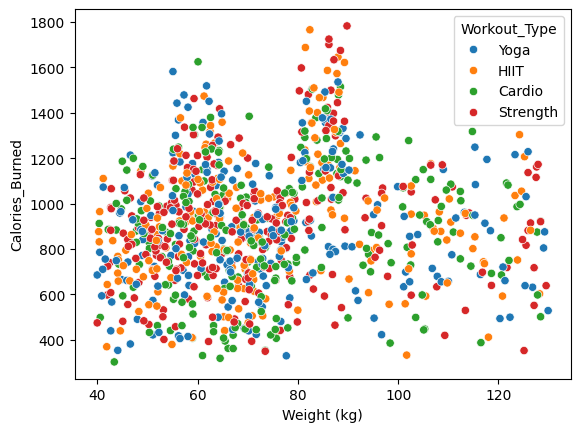

In [ ]:
sns.scatterplot(data=dat, x='Weight (kg)', y='Calories_Burned', hue='Workout_Type')

# Are the means for these workout groups statistically different?

print(datMediumMen.groupby('Workout_Type')['Calories_Burned'].mean())


datHIIT = dat.loc[dat['Workout_Type'] == 'HIIT', ['Calories_Burned']]
datYoga = dat.loc[dat['Workout_Type'] == 'Yoga', ['Calories_Burned']]

tStatType, pValueType = stats.ttest_ind(datHIIT, datYoga)

pValueType < alpha
# There is not enough evidence to conclude that there is a statistically significant difference in the most different forms of working out (HIIT and Yoga).

In [ ]:
datMediumMen['Session_Duration (hours)'].mean()
datHeavyandLightMen['Session_Duration (hours)'].mean()

tStatSeshMen, pValueSeshMen = stats.ttest_ind(datMediumMen['Session_Duration (hours)'], datHeavyandLightMen['Session_Duration (hours)'])

datMediumWomen = datFemale.loc[(datFemale['Weight (kg)'] < 70) & (datFemale['Weight (kg)'] > 50)]
datHeavyandLightWomen = datFemale.loc[(datFemale['Weight (kg)'] < 50) | (datFemale['Weight (kg)'] > 70)]

tStatSeshWomen, pValueSeshWomen = stats.ttest_ind(datMediumWomen['Session_Duration (hours)'], datHeavyandLightWomen['Session_Duration (hours)'])

(pValueSeshMen and pValueSeshWomen) < alpha
# The length of the workout of these people are greater than those that are very heavy or very light.

True

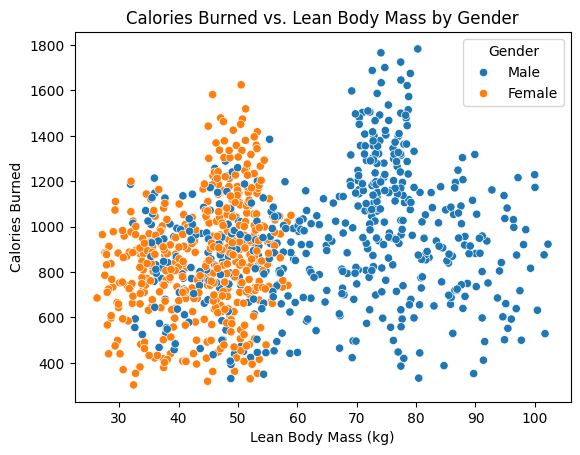

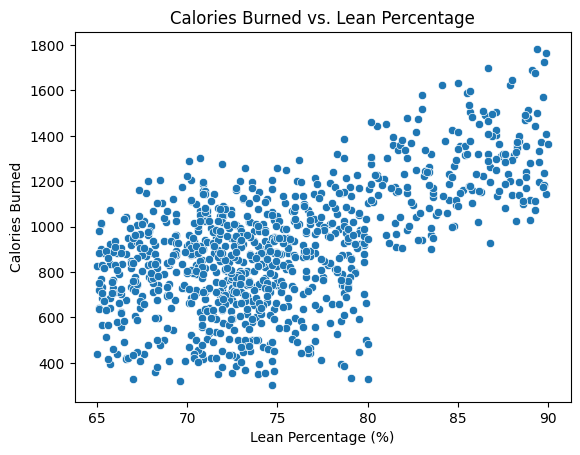

The correlation between percentage of lean mass and calories burned for all individuals is: 0.5976152476507981


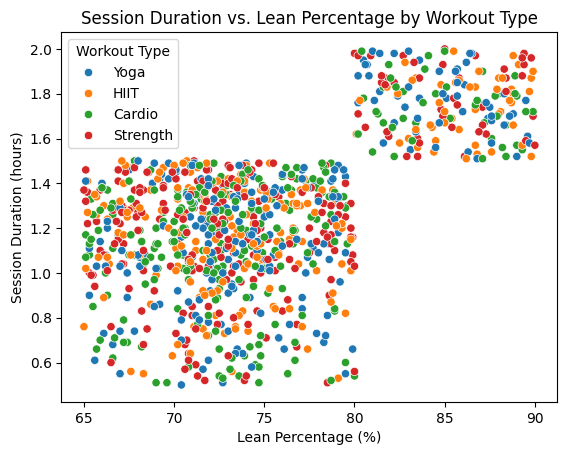

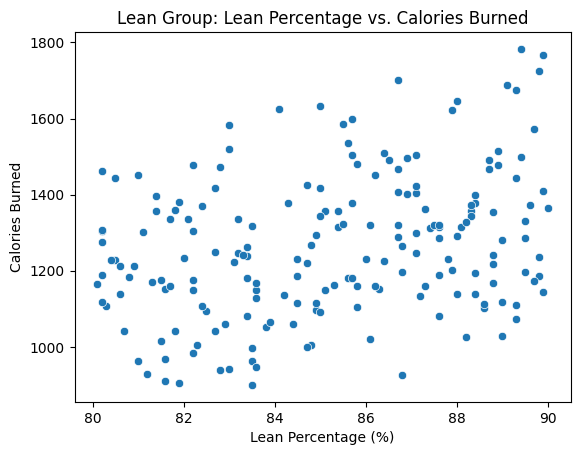

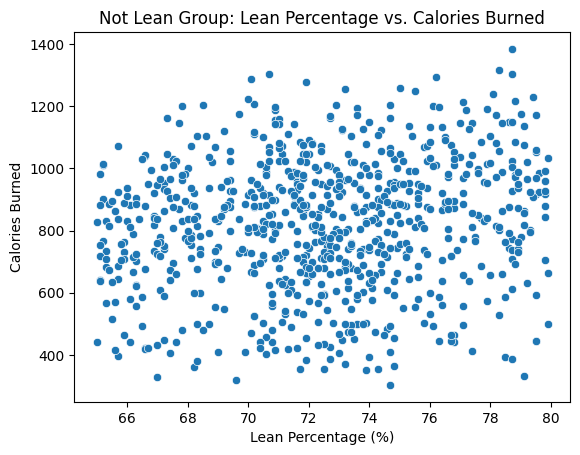

In [ ]:
# Do people with higher percentages of lean mass burn more calories than those with lower percentages of lean mass?

dat['Lean Body Mass'] = ((100 - dat['Fat_Percentage']) * dat['Weight (kg)']) / 100

dat['Lean Percentage'] = (dat['Lean Body Mass'] / dat['Weight (kg)']) * 100

# Scatterplot for Lean Body Mass vs. Calories Burned
sns.scatterplot(data=dat, x='Lean Body Mass', y='Calories_Burned', hue='Gender')
plt.title('Calories Burned vs. Lean Body Mass by Gender')
plt.xlabel('Lean Body Mass (kg)')
plt.ylabel('Calories Burned')
plt.legend(title='Gender')
plt.show()

# Scatterplot for Lean Percentage vs. Calories Burned
sns.scatterplot(data=dat, x='Lean Percentage', y='Calories_Burned')
plt.title('Calories Burned vs. Lean Percentage')
plt.xlabel('Lean Percentage (%)')
plt.ylabel('Calories Burned')
plt.show()

# Correlation between Lean Percentage and Calories Burned
corrAll, pValueall = stats.pearsonr(x=dat['Lean Percentage'], y=dat['Calories_Burned'])
print('The correlation between percentage of lean mass and calories burned for all individuals is: ' + str(corrAll))

# Scatterplot for Lean Percentage vs. Session Duration with Workout Type
sns.scatterplot(data=dat, x='Lean Percentage', y='Session_Duration (hours)', hue='Workout_Type')
plt.title('Session Duration vs. Lean Percentage by Workout Type')
plt.xlabel('Lean Percentage (%)')
plt.ylabel('Session Duration (hours)')
plt.legend(title='Workout Type')
plt.show()

# This is particularly interesting.
# The session duration for individuals above and below 80% lean body mass is inherently nonlinear.
# This shows that those with higher lean mass percentages are associated to having longer workouts.

datLean = dat.loc[dat['Lean Percentage'] > 80]
datNotLean = dat.loc[dat['Lean Percentage'] < 80]

# Scatterplot for the Lean Group
sns.scatterplot(data=datLean, x='Lean Percentage', y='Calories_Burned')
plt.title('Lean Group: Lean Percentage vs. Calories Burned')
plt.xlabel('Lean Percentage (%)')
plt.ylabel('Calories Burned')
plt.show()

# Scatterplot for the "Not Lean Group"
sns.scatterplot(data=datNotLean, x='Lean Percentage', y='Calories_Burned')
plt.title('Not Lean Group: Lean Percentage vs. Calories Burned')
plt.xlabel('Lean Percentage (%)')
plt.ylabel('Calories Burned')
plt.show()


# Lowering body fat relative to the amount of lean mass can help burn more calories in the gym.


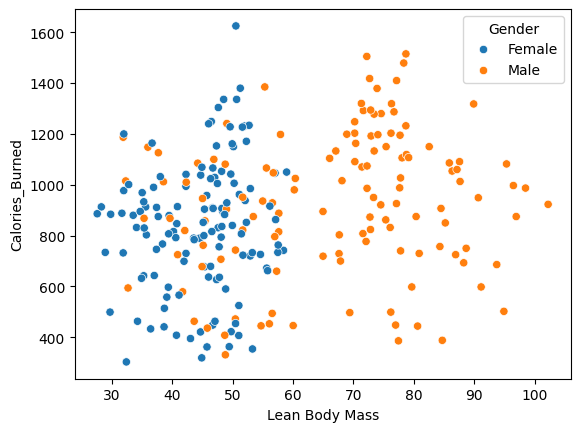

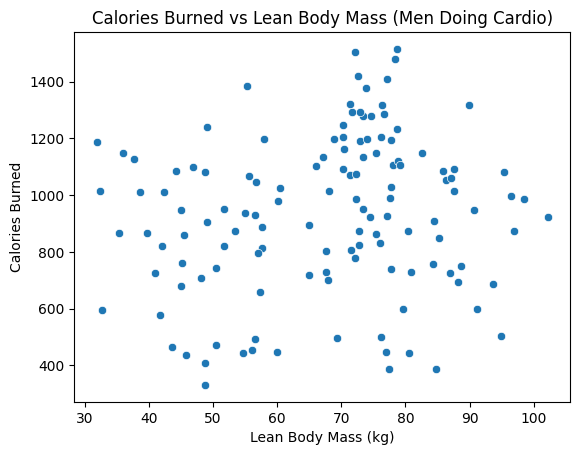

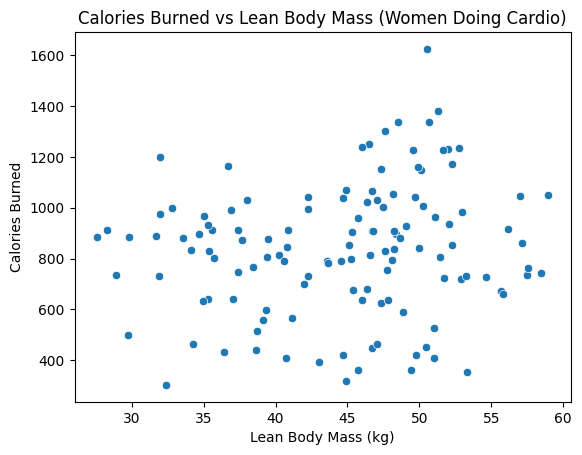

PearsonRResult(statistic=0.29456737799621235, pvalue=1.6895851313329604e-06)

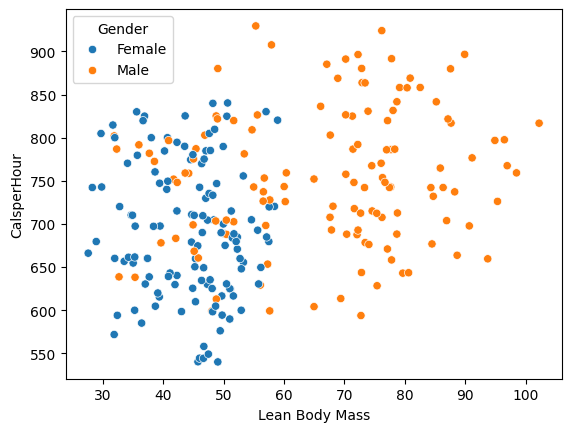

In [ ]:
# Do individuals that have a higher lean mass burn more calories doing cardio than those that have a lower lean mass?
# Assume cardio is steady state since HIIT takes into account higher intensity.


#Subset based on workout type
datCardio = dat.loc[dat['Workout_Type'] == 'Cardio']
sns.scatterplot(data=datCardio, x='Lean Body Mass', y='Calories_Burned', hue='Gender')
plt.show()

# Subset on gender since the distribution for calories burned is bimodal.
datCardioMen = datCardio.loc[datCardio['Gender'] == 'Male']
datCardioWomen = datCardio.loc[datCardio['Gender'] == 'Female']

# Scatterplot for men doing cardio
sns.scatterplot(data=datCardioMen, x='Lean Body Mass', y='Calories_Burned')
plt.title('Calories Burned vs Lean Body Mass (Men Doing Cardio)')
plt.xlabel('Lean Body Mass (kg)')
plt.ylabel('Calories Burned')
plt.show()

# Scatterplot for women doing cardio
sns.scatterplot(data=datCardioWomen, x='Lean Body Mass', y='Calories_Burned')
plt.title('Calories Burned vs Lean Body Mass (Women Doing Cardio)')
plt.xlabel('Lean Body Mass (kg)')
plt.ylabel('Calories Burned')
plt.show()


# defining the median lean body mass for women - can't assume mean because the distribution is unknown/unsymmetric.
medianLeanMassWomen = np.median(datCardioWomen['Lean Body Mass'])
AboveMassWomen = datCardioWomen.loc[datCardioWomen['Lean Body Mass'] > medianLeanMassWomen]
BelowMassWomen = datCardioWomen.loc[datCardioWomen['Lean Body Mass'] < medianLeanMassWomen]

# median for men
medianLeanMassMen = np.median(datCardioMen['Lean Body Mass'])
AboveMassMen = datCardioMen.loc[datCardioMen['Lean Body Mass'] > medianLeanMassMen]
BelowMassMen = datCardioMen.loc[datCardioMen['Lean Body Mass'] < medianLeanMassMen]

tStatWomen, pValueWomen = stats.ttest_ind(AboveMassWomen['Calories_Burned'], BelowMassWomen['Calories_Burned'])
tStatMen, pValueMen = stats.ttest_ind(AboveMassMen['Calories_Burned'], BelowMassMen['Calories_Burned'])

(pValueWomen and pValueMen) < alpha

# This certifies that those with more lean body mass, when fixing for cardio (cannot determine the intensity of weightlifting etc.)
# they burn more calories.


In [ ]:
### Cross validation model using LASSO regression
# Convert Gender to binary - Male = 1
dat['GenderMale'] = 1
dat.loc[dat['Gender'] == 'Female', ['GenderMale']] = 0

# Assign predictors and response
X = dat.loc[:, ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
                              'Resting_BPM', 'Session_Duration (hours)', 'Fat_Percentage',
                              'Water_Intake (liters)', 'Workout_Frequency (days/week)',
                              'Experience_Level', 'BMI', 'Lean Body Mass',
                              'Lean Percentage', 'GenderMale']]
y = dat['Calories_Burned']

# Set random seed
np.random.seed(4679)

# Perform the LASSO with 5 cross folds
lassocv = sklm.LassoCV(cv = 5, max_iter = 10000)
lassocv.fit(X, y)

# Print the optimal regularization parameter
print(lassocv.alpha_)

# Make predictions
observed = lassocv.predict(X)

# calculate mean squared error
MSElasso = ((observed - y)**2).mean()
print("The average MSE of all 5 folds is " +str(MSElasso))

print(lassocv.coef_)

# Notable coefficients reduced to 0: Height, Fat Percentage, Water Intake, Experience Level

1.327063603206409
The average MSE of all 5 folds is 1573.2038943535274
[-3.38734549e+00 -2.22032260e+00  0.00000000e+00  4.06833266e-03
  6.24103852e+00  3.34418074e-01  6.88741315e+02  0.00000000e+00
  0.00000000e+00  4.42855320e-01  0.00000000e+00 -2.11302262e-01
  3.36630518e+00 -9.72564808e-01  6.89247039e+01]


In [ ]:
### Running a MLR on the same data using CV
# Assign Predictors
X2 = dat.loc[:,['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
              'Resting_BPM', 'Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)',
              'Experience_Level', 'BMI', 'Lean Body Mass', 'Lean Percentage', 'GenderMale']]
X2 = sm.add_constant(X2)

# Assign Response
y2 = dat['Calories_Burned']

# Fit the Model
MLRfit = sm.OLS(y2, X2).fit()

# Calculate Mean Squared Error without CV
print(((MLRfit.predict(X2) - y2)**2).mean())

# Assign Predictors
X2 = dat.loc[:, ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
                 'Resting_BPM', 'Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)',
                 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Lean Body Mass',
                 'Lean Percentage', 'GenderMale']]
X2 = sm.add_constant(X2)

# Assign Response
y2 = dat['Calories_Burned']

# Create an empty array to which the MSEs for each cross validation procedure will be added.
MSEhist = np.array([])

# Run the process 100 times.
for j in range(100):
    # Define MSEtest to which the MSE for 5 cross folds (a single iteration) will be added.
    MSEtest = []

    # Assign random groupings for cross folds
    len(dat['Calories_Burned']) # 973
    CVobj = [1, 2, 3, 4, 5] * (len(dat) // 5) + [1, 2, 3] # Each CV 1, 2, and 3 will have one extra observation.

    # Scramble the assignments
    CVobj = np.random.choice(CVobj, len(CVobj), replace=False)

    dat['CVgroup'] = CVobj

    # Define the 5 cross folds
    for i in [1, 2, 3, 4, 5]:

        # Assign test and train group
        cvTrain = dat[dat['CVgroup'] != i]
        cvTest = dat[dat['CVgroup'] == i]

        # Training Predictors and Response
        X2TRAIN = cvTrain.loc[:, ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
                                  'Resting_BPM', 'Session_Duration (hours)', 'Fat_Percentage',
                                  'Water_Intake (liters)', 'Workout_Frequency (days/week)',
                                  'Experience_Level', 'BMI', 'Lean Body Mass',
                                  'Lean Percentage', 'GenderMale']]
        X2TRAIN = sm.add_constant(X2TRAIN)

        y2TRAIN = cvTrain['Calories_Burned']

        # Testing Predictors and Response
        X2TEST = cvTest.loc[:, ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
                                'Resting_BPM', 'Session_Duration (hours)', 'Fat_Percentage',
                                'Water_Intake (liters)', 'Workout_Frequency (days/week)',
                                'Experience_Level', 'BMI', 'Lean Body Mass',
                                'Lean Percentage', 'GenderMale']]
        X2TEST = sm.add_constant(X2TEST)

        y2TEST = cvTest['Calories_Burned']

        # Create a new linear model with each fold based on the training data
        MLRfit = sm.OLS(y2TRAIN, X2TRAIN).fit()

        # Predict the response using the model created from the training data
        y2PREDICT = MLRfit.predict(X2TEST)

        # Calculate MSE and add it to the MSEtest - which has the MSE for each crossfold.
        MSE = ((y2PREDICT - y2TEST) ** 2).mean()
        MSEtest.append(MSE)

    # Calculate the mean of the 5 crossfolds, then add them to MSEhist.
    meanMSE = np.mean(MSEtest)
    MSEhist = np.append(MSEhist, meanMSE)

# How likely the mean of the MSEs for the 5cv MLR is going to outperform the LASSO fit model
(MSElasso > MSEhist).mean()

# in one iteration of this code, the lasso regression is outperformed by the MLR with all predictors in 96% of trials (96/100).

# Including predictors that may be linear combinations of other variables results in a lower test MSE.
# These variables may all be significant with low levels of multicollinearity.


1493.1784815591236


0.97